In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("academic Stress level - maintainance 1.csv")

In [85]:
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [86]:
#replacing the names of the columns with more concise ones
df.rename(columns={
    "Your Academic Stage": "Academic Stage",
    "Academic pressure from your home": "Household Stress",
    "What coping strategy you use as a student?": "Coping strategy",
    "Do you have any bad habits like smoking, drinking on a daily basis?": "Bad habits",
    "What would you rate the academic  competition in your student life": "Competition",
    "Rate your academic stress index ": "Stress"
    
}, inplace=True)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Timestamp          140 non-null    object
 1   Academic Stage     140 non-null    object
 2   Peer pressure      140 non-null    int64 
 3   Household Stress   140 non-null    int64 
 4   Study Environment  139 non-null    object
 5   Coping strategy    140 non-null    object
 6   Bad habits         140 non-null    object
 7   Competition        140 non-null    int64 
 8   Stress             140 non-null    int64 
dtypes: int64(4), object(5)
memory usage: 10.0+ KB


In [88]:
#dropping timestamp column
df.drop(columns=['Timestamp'],inplace=True)

In [89]:
#dropping missing values
df.dropna(inplace=True)

In [90]:
#changing coping strategy column values to be more concise
df['Coping strategy'] = df['Coping strategy'].str.replace('Analyze the situation and handle it with intellect','analyze with intellect')
df['Coping strategy'] = df['Coping strategy'].str.replace('Social support (friends, family)','social support')
df['Coping strategy'] = df['Coping strategy'].str.replace('Emotional breakdown (crying a lot)','emotional breakdown')

In [91]:
df

,Academic Stage,Peer pressure,Household Stress,Study Environment,Coping strategy,Bad habits,Competition,Stress
0,undergraduate,4,5,Noisy,analyze with intellect,No,3,5
1,undergraduate,3,4,Peaceful,analyze with intellect,No,3,3
2,undergraduate,1,1,Peaceful,social support,No,2,4
3,undergraduate,3,2,Peaceful,analyze with intellect,No,4,3
4,undergraduate,3,3,Peaceful,analyze with intellect,No,4,5
...,...,...,...,...,...,...,...,...
135,undergraduate,3,2,Peaceful,analyze with intellect,No,3,4
136,undergraduate,4,2,disrupted,analyze with intellect,No,3,3
137,undergraduate,3,3,Peaceful,analyze with intellect,No,2,4
138,undergraduate,4,5,disrupted,social support,No,5,5


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Academic Stage     139 non-null    object
 1   Peer pressure      139 non-null    int64 
 2   Household Stress   139 non-null    int64 
 3   Study Environment  139 non-null    object
 4   Coping strategy    139 non-null    object
 5   Bad habits         139 non-null    object
 6   Competition        139 non-null    int64 
 7   Stress             139 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 9.8+ KB


<Axes: xlabel='Stress', ylabel='count'>

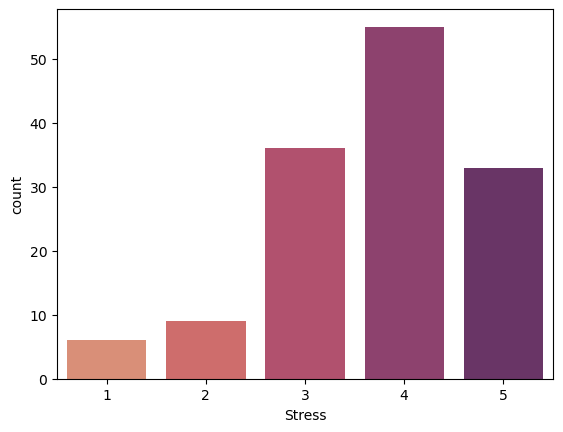

In [93]:
#seeing how the data is distributed among stress levels
sns.countplot(data=df,x='Stress',palette='flare')

<Axes: xlabel='Academic Stage', ylabel='count'>

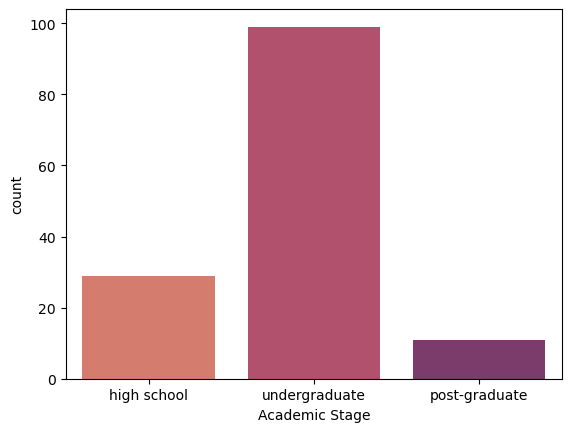

In [94]:
#seeing how the data is distributed between different academic stages
acad_stage_order = ['high school','undergraduate','post-graduate']
sns.countplot(data=df,x='Academic Stage',palette='flare',order=acad_stage_order)

<Axes: xlabel='Academic Stage', ylabel='Stress'>

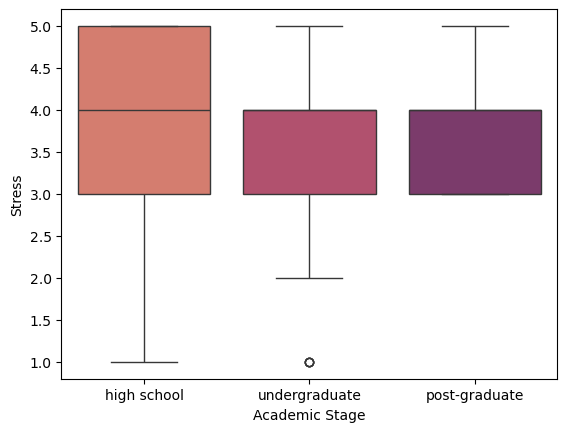

In [95]:
#seeing the relationship between academic stage and stress levels
sns.boxplot(data=df,x='Academic Stage',y='Stress',palette='flare',order=acad_stage_order)

<Axes: xlabel='Bad habits', ylabel='Stress'>

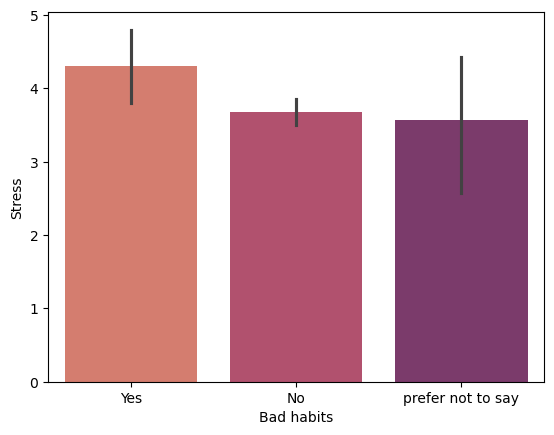

In [96]:
#seeing if there is a relationship between having bad habits and having high stress levels
habits_order = ['Yes','No','prefer not to say']
sns.barplot(data=df,x='Bad habits',y='Stress',palette='flare',order=habits_order)

<Axes: xlabel='Academic Stage', ylabel='Household Stress'>

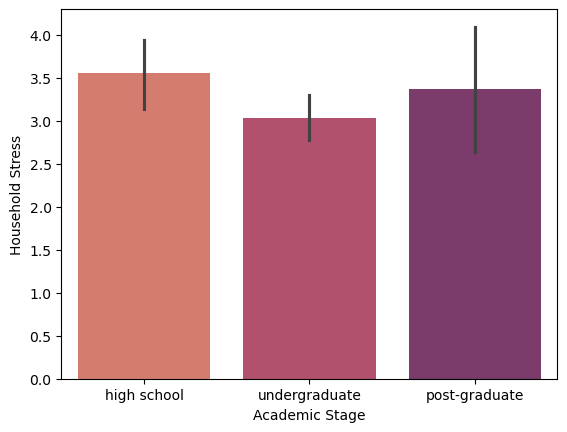

In [97]:
#seeing how household stress changes with academic stage
sns.barplot(data=df,x='Academic Stage',y='Household Stress',palette='flare',order=acad_stage_order)

<Axes: xlabel='Study Environment', ylabel='count'>

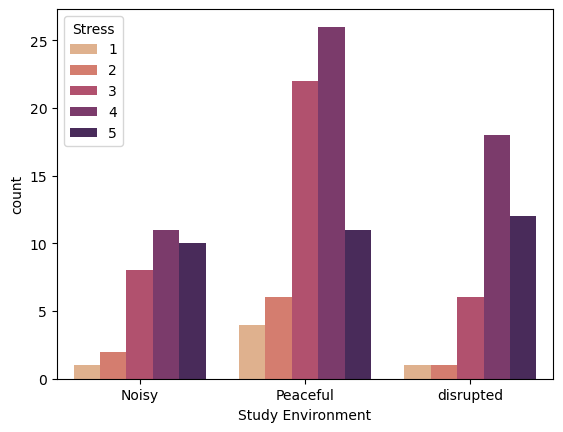

In [98]:
#seeing how stress levels are affected by study environment
sns.countplot(data=df,x='Study Environment',hue='Stress',palette='flare')

<Axes: xlabel='Academic Stage'>

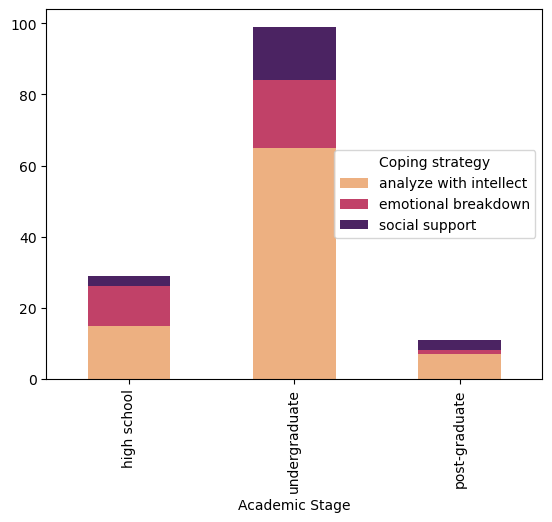

In [99]:
#seeing the different coping strategies among academic stage
stage_vs_strategy = pd.crosstab(df['Academic Stage'],df['Coping strategy'])
stage_vs_strategy = stage_vs_strategy.reindex(acad_stage_order)
stage_vs_strategy.plot(kind='bar',stacked=True,colormap='flare')

<Axes: xlabel='Bad habits', ylabel='Coping strategy'>

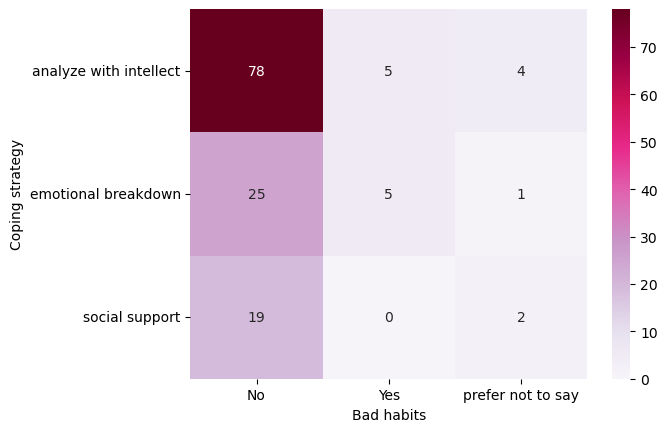

In [100]:
#seeing the relationship between coping strategies and bad habits, and whether those with unhealthy coping strategies also have bad habits
df_cross = pd.crosstab(df['Coping strategy'],df['Bad habits'])
sns.heatmap(df_cross,cmap='PuRd',annot=True)

<Axes: >

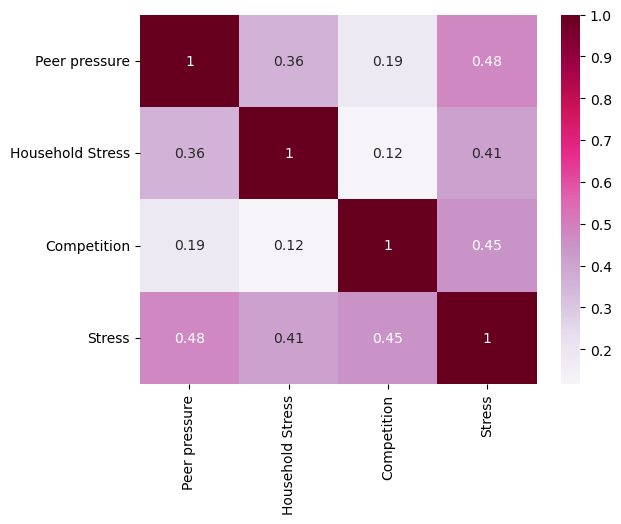

In [101]:
#seeing the correlation of other types of stress with the academic stress index
df_numerical = df[['Peer pressure','Household Stress','Competition','Stress']]
numerical_corrs = df_numerical.corr()
sns.heatmap(numerical_corrs,annot=True,cmap='PuRd')

In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
#encoding categorical variables
df_encoded = pd.get_dummies(df,columns=['Academic Stage','Study Environment','Coping strategy','Bad habits'],drop_first=True)

In [104]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 139 entries, 0 to 139
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Peer pressure                        139 non-null    int64
 1   Household Stress                     139 non-null    int64
 2   Competition                          139 non-null    int64
 3   Stress                               139 non-null    int64
 4   Academic Stage_post-graduate         139 non-null    bool 
 5   Academic Stage_undergraduate         139 non-null    bool 
 6   Study Environment_Peaceful           139 non-null    bool 
 7   Study Environment_disrupted          139 non-null    bool 
 8   Coping strategy_emotional breakdown  139 non-null    bool 
 9   Coping strategy_social support       139 non-null    bool 
 10  Bad habits_Yes                       139 non-null    bool 
 11  Bad habits_prefer not to say         139 non-null    bool 
dtyp

In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X = df_encoded.drop('Stress',axis=1)
y = df_encoded['Stress']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [107]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [108]:
#using logistic regression model to predict stress index level
lr_model = LogisticRegression(class_weight='balanced',max_iter=1000,random_state=42)

In [109]:
pipeline = Pipeline([('classifier',lr_model)])

In [110]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [111]:
y_pred = pipeline.predict(X_test)

In [112]:
from sklearn.metrics import classification_report,confusion_matrix

In [113]:
#model is performing poorly
print("Classification Report")
print(classification_report(y_test,y_pred))

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.50      0.67         2
           2       0.25      0.50      0.33         2
           3       0.22      0.17      0.19        12
           4       0.35      0.40      0.38        15
           5       0.45      0.45      0.45        11

    accuracy                           0.36        42
   macro avg       0.46      0.40      0.40        42
weighted avg       0.37      0.36      0.36        42



In [114]:
print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix
[[1 1 0 0 0]
 [0 1 0 1 0]
 [0 1 2 6 3]
 [0 1 5 6 3]
 [0 0 2 4 5]]


In [115]:
#binning stress levels to improve model performance
#splitting stress into 3 groups, low, medium and high
df_encoded['Stress level'] = pd.cut(df_encoded['Stress'],bins=[0.5, 2.5, 3.5, 5.5],labels=['Low','Medium','High'])

In [116]:
X = df_encoded.drop('Stress level',axis=1)
y = df_encoded['Stress level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [117]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [118]:
y_pred_new = pipeline.predict(X_test)

In [119]:
#model performance is improved
print("New Classification Report")
print(classification_report(y_test,y_pred_new))

New Classification Report
              precision    recall  f1-score   support

        High       0.96      1.00      0.98        26
         Low       1.00      0.75      0.86         4
      Medium       0.92      0.92      0.92        12

    accuracy                           0.95        42
   macro avg       0.96      0.89      0.92        42
weighted avg       0.95      0.95      0.95        42



In [120]:
print("New Confusion Matrix")
print(confusion_matrix(y_test,y_pred_new))

New Confusion Matrix
[[26  0  0]
 [ 0  3  1]
 [ 1  0 11]]
